# 01. EDA

### Importando as bibliotecas

In [1]:
import sys
import os
sys.path.append('..')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

### Configurando para serem exibidas apenas mensagens de erro no Tensor Flow

In [2]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # Configurando para serem exibidas apenas mensagens de erro no Tensor Flow

### Lendo o dataset e visualizando um overview

In [3]:
df = keras.datasets.mnist # Armazenando o dataset em uma variável

In [4]:
(x_train, y_train), (x_test, y_test) = df.load_data() # Armazenando os dados do df já divididos em X e Y de treino e teste

In [5]:
x_train[0][1] # Exibindo a 2ª linha da 1ª imagem do conjunto de x de treino

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [6]:
x_train.shape # Verificando a quantidade de imagens, pixels na horizontal e pixels na vertical

(60000, 28, 28)

In [7]:
y_train[:5] # Exibindo os 5 primeiros valores de y de treino (o y de treino contém somente as respostas finais com a identificação do número)

array([5, 0, 4, 1, 9], dtype=uint8)

### Verificando o balanceamento do dataset

In [8]:
np.unique(y_train) # Verificando se realmente existem os número de 0 a 9

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [9]:
np.unique(y_train, return_counts=True) # Verificando a distribuição de valores

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

In [10]:
contagem = tuple(zip(*np.unique(y_train, return_counts=True))) # Criando tuplas com o unpacking dos arrays, através do zip

for tupla in contagem: # Criando uma estrutura de repetição para calcular a porcentagem de cada número no conjunto y de treino
    print(f'{tupla[0]}: {tupla[1] / len(y_train) * 100:.2f}%')

0: 9.87%
1: 11.24%
2: 9.93%
3: 10.22%
4: 9.74%
5: 9.04%
6: 9.86%
7: 10.44%
8: 9.75%
9: 9.92%


Após a análise, é verificado que o dataset está balanceado e não é necessário aplicar nenhum tratamento para datasets desbalanceados.

### Exibindo através de gráficos as imagens em escala de cinza e seus respectivos valores de y

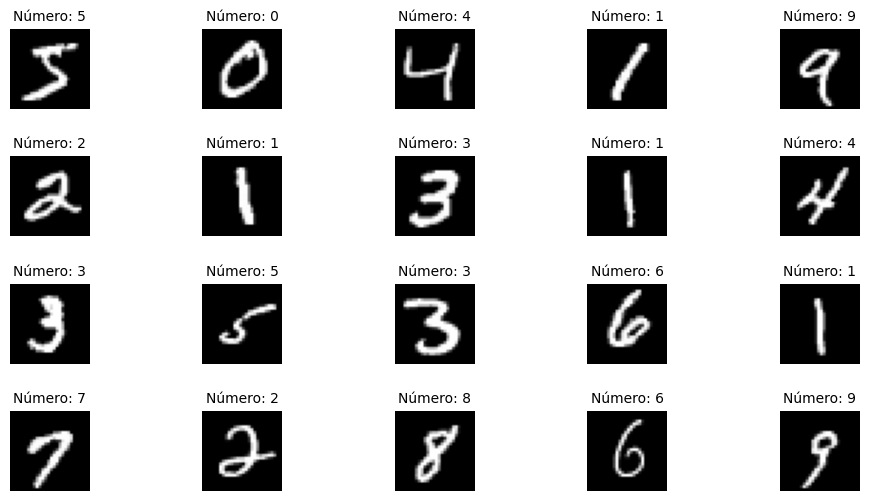

In [11]:
fig, axs = plt.subplots(figsize=(12,6), nrows=4, ncols=5) # Definindo o tamanho da figura para exibir os gráficos

for i, ax in enumerate(axs.flat): # Criando uma estrutura de repetição para percorrer cada valor de x e plotar em um gráfico
    ax.imshow(x_train[i], cmap='gray') # Plotando a imagem em um gráfico em escala de cinza
    ax.set_title(f'Número: {y_train[i]}', size=10) # Definindo o título do gráfico
    ax.axis('off') # Desativando os títulos dos eixos

fig.subplots_adjust(hspace=0.6) # Ajustando o espaço entre cada subfigura

plt.show() # Exibindo os gráficos

### Exibindo através de um gráfico a imagem e seus respectivos valores de cada pixels em escala de cinza

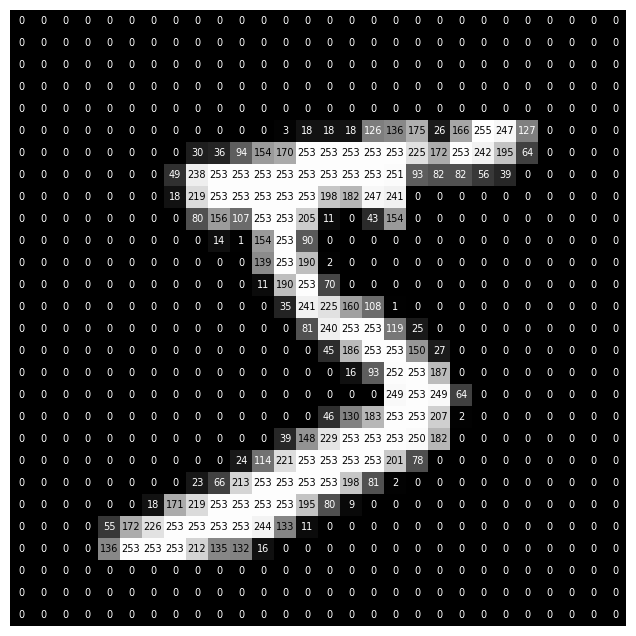

In [12]:
fig, ax = plt.subplots(figsize=(8,8)) # Definindo o tamanho da figura para exibir os gráficos

ax.imshow(x_train[0], cmap='gray') # Plotando a imagem em um gráfico em escala de cinza
ax.axis('off') # Desativando os títulos dos eixos

for line in range(28): # Criando duas estruturas de repetição para percorrer cada pixel em cada linha e em cada coluna, e exibir o valor da sua escalar de cinza
    for column in range(28):
        color = x_train[0][line][column] # Armazenando em uma variável o valor da escala de cinza de cada pixel
        ax.annotate( # Fazendo uma anotação no próprio pixel com o valor da sua escala de cinza
            str(color), # Passando o valor com a escala de cinza do pixel
            xy=(column, line), # Passando a posição do pixel em que a anotação deve ser feita
            color = 'black' if color > (255/2) else 'white', # Definindo a cor da anotação
            horizontalalignment='center', # Definindo o alinhamento horizontal
            verticalalignment='center', # Definindo o alinhamento vertical
            size = 7 # Definindo o tamanho da fonte
        )

plt.show() # Exibindo os gráficos

### Exibindo através de um gráfico a imagem e seus respectivos valores de cada pixels em escala de cinza, ajustados para uma escala de 0 a 1

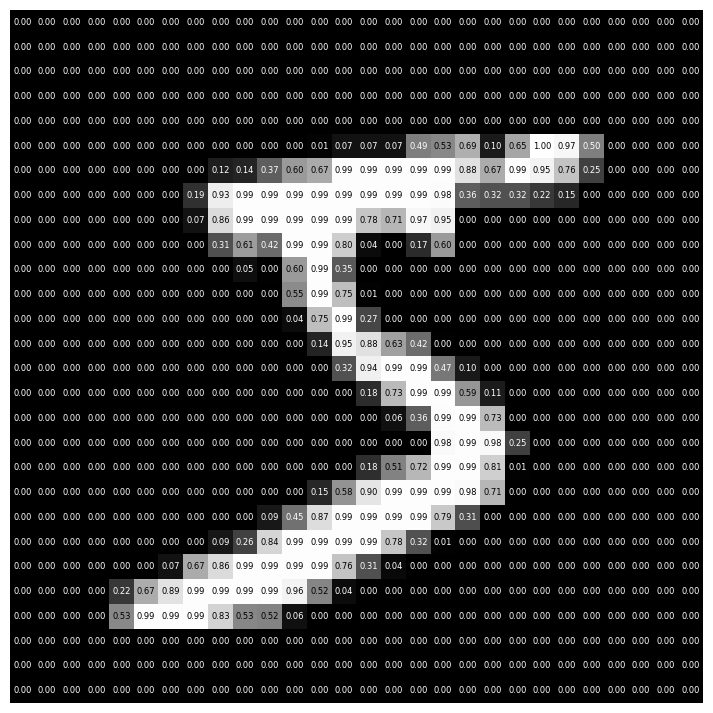

In [13]:
fig, ax = plt.subplots(figsize=(9,9)) # Definindo o tamanho da figura para exibir os gráficos

ax.imshow(x_train[0] / 255, cmap='gray') # Plotando a imagem em um gráfico em escala de cinza, já na escala de 0 a 1
ax.axis('off') # Desativando os títulos dos eixos

for line in range(28): # Criando duas estruturas de repetição para percorrer cada pixel em cada linha e em cada coluna, e exibir o valor da sua escalar de cinza
    for column in range(28):
        color = x_train[0][line][column] /  255 # Armazenando em uma variável o valor da escala de cinza de cada pixel, já na escala de 0 a 1
        ax.annotate( # Fazendo uma anotação no próprio pixel com o valor da sua escala de cinza
            f'{color:.2f}', # Passando o valor com a escala de cinza do pixel
            xy=(column, line), # Passando a posição do pixel em que a anotação deve ser feita
            color = 'black' if color > 0.5 else 'white', # Definindo a cor da anotação (Usando a escala de 0 a 1)
            horizontalalignment='center', # Definindo o alinhamento horizontal
            verticalalignment='center', # Definindo o alinhamento vertical
            size = 6 # Definindo o tamanho da fonte
        )

plt.show() # Exibindo os gráficos